In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfl = pd.read_csv("dfl_loss.csv", index_col="Step")
cls = pd.read_csv("cls_loss.csv", index_col="Step")
box = pd.read_csv("box_loss.csv", index_col="Step")

In [3]:
average_col = (dfl["train/dfl_loss"]+cls["train/cls_loss"]+box["train/box_loss"])/3
avg_loss_df = pd.DataFrame({"avg_train_loss": average_col})

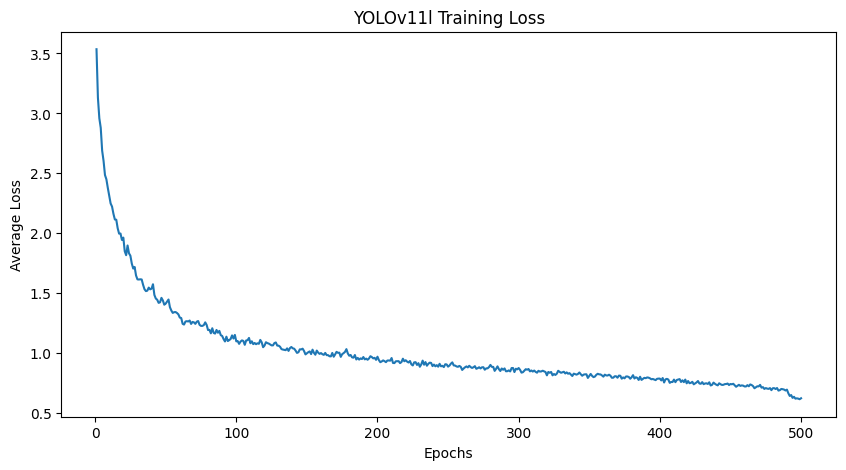

In [4]:
plt.figure(figsize=(10,5))
plt.title("YOLOv11l Training Loss")
plt.plot(average_col)
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.savefig("yolov11l_avg_train_loss.pdf")
plt.show()

In [5]:
all_box = pd.read_csv("all_box_loss.csv", index_col = "Step")
all_dfl = pd.read_csv("all_dfl_loss.csv", index_col = "Step")
all_cls = pd.read_csv("all_cls_loss.csv", index_col = "Step")

In [6]:
all_box = all_box.loc[:,~all_box.columns.str.contains('MIN')]
all_dfl = all_dfl.loc[:,~all_dfl.columns.str.contains('MIN')]
all_cls = all_cls.loc[:,~all_cls.columns.str.contains('MIN')]

all_box = all_box.loc[:,~all_box.columns.str.contains('MAX')]
all_dfl = all_dfl.loc[:,~all_dfl.columns.str.contains('MAX')]
all_cls = all_cls.loc[:,~all_cls.columns.str.contains('MAX')]

In [7]:
n_loss = (all_box["05072025_yolov11n_histEQ - train/box_loss"] +
         all_dfl["05072025_yolov11n_histEQ - train/dfl_loss"] +
         all_cls["05072025_yolov11n_histEQ - train/cls_loss"])/3

In [8]:
s_loss = (all_box["05072025_yolov11s_histEQ2 - train/box_loss"] +
         all_dfl["05072025_yolov11s_histEQ2 - train/dfl_loss"] +
         all_cls["05072025_yolov11s_histEQ2 - train/cls_loss"])/3

In [9]:
m_loss = (all_box["04072025_yolov11m_histEQ - train/box_loss"] +
         all_dfl["04072025_yolov11m_histEQ - train/dfl_loss"] +
         all_cls["04072025_yolov11m_histEQ - train/cls_loss"])/3

In [10]:
l_loss = (all_box["05072025_yolov11l_histEQ3 - train/box_loss"] +
         all_dfl["05072025_yolov11l_histEQ3 - train/dfl_loss"] +
         all_cls["05072025_yolov11l_histEQ3 - train/cls_loss"])/3

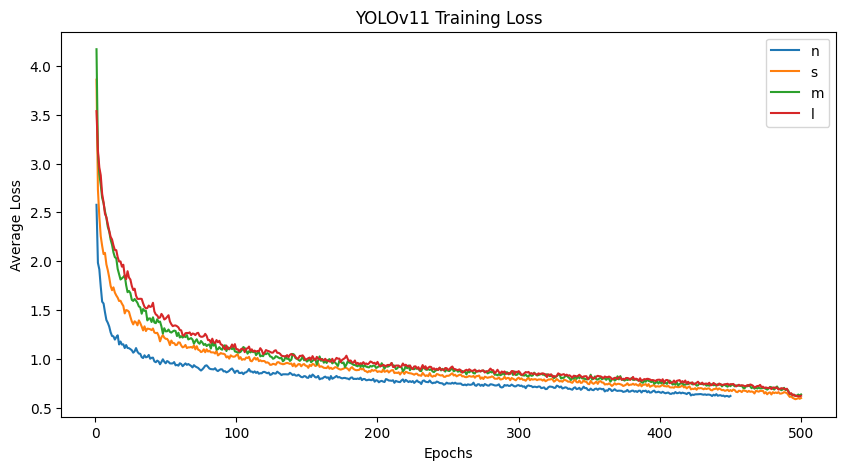

In [11]:
plt.figure(figsize=(10,5))
plt.title("YOLOv11 Training Loss")
plt.plot(n_loss, label="n")
plt.plot(s_loss, label="s")
plt.plot(m_loss, label="m")
plt.plot(l_loss, label="l")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.savefig("yolov11_all_avg_train_loss.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show()

In [12]:
val_dfl = pd.read_csv("all_val_dfl.csv", index_col = "Step")
val_box = pd.read_csv("all_val_box.csv", index_col = "Step")
val_cls = pd.read_csv("all_val_cls.csv", index_col = "Step")

In [13]:
val_dfl = val_dfl.loc[:,~val_dfl.columns.str.contains('MIN')]
val_box = val_box.loc[:,~val_box.columns.str.contains('MIN')]
val_cls = val_cls.loc[:,~val_cls.columns.str.contains('MIN')]

val_dfl = val_dfl.loc[:,~val_dfl.columns.str.contains('MAX')]
val_box = val_box.loc[:,~val_box.columns.str.contains('MAX')]
val_cls = val_cls.loc[:,~val_cls.columns.str.contains('MAX')]

In [14]:
n_val_loss = (val_box["05072025_yolov11n_histEQ - val/box_loss"] +
         val_dfl["05072025_yolov11n_histEQ - val/dfl_loss"] +
         val_cls["05072025_yolov11n_histEQ - val/cls_loss"])/3

In [15]:
s_val_loss = (val_box["05072025_yolov11s_histEQ2 - val/box_loss"] +
         val_dfl["05072025_yolov11s_histEQ2 - val/dfl_loss"] +
         val_cls["05072025_yolov11s_histEQ2 - val/cls_loss"])/3

In [16]:
m_val_loss = (val_box["04072025_yolov11m_histEQ - val/box_loss"] +
         val_dfl["04072025_yolov11m_histEQ - val/dfl_loss"] +
         val_cls["04072025_yolov11m_histEQ - val/cls_loss"])/3

In [17]:
l_val_loss = (val_box["05072025_yolov11l_histEQ3 - val/box_loss"] +
         val_dfl["05072025_yolov11l_histEQ3 - val/dfl_loss"] +
         val_cls["05072025_yolov11l_histEQ3 - val/cls_loss"])/3

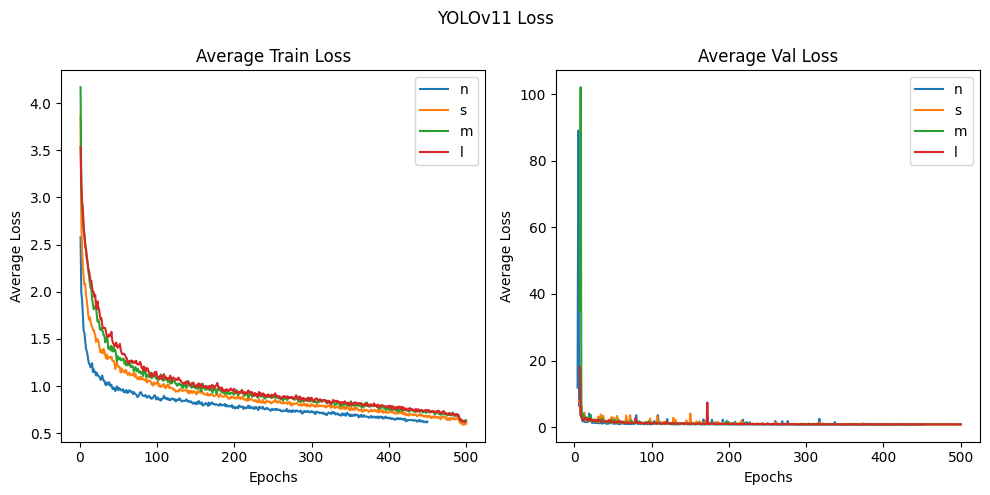

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("YOLOv11 Loss")
ax1.set_title("Average Train Loss")
ax1.plot(n_loss, label="n")
ax1.plot(s_loss, label="s")
ax1.plot(m_loss, label="m")
ax1.plot(l_loss, label="l")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Average Loss")
ax1.legend()

ax2.set_title("Average Val Loss")
ax2.plot(n_val_loss, label="n")
ax2.plot(s_val_loss, label="s")
ax2.plot(m_val_loss, label="m")
ax2.plot(l_val_loss, label="l")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss")
ax2.legend()
fig.tight_layout()
fig.align_labels()
fig.savefig("yolov11_all_avg_losses.pdf",bbox_inches='tight', transparent="True", pad_inches=0.1)

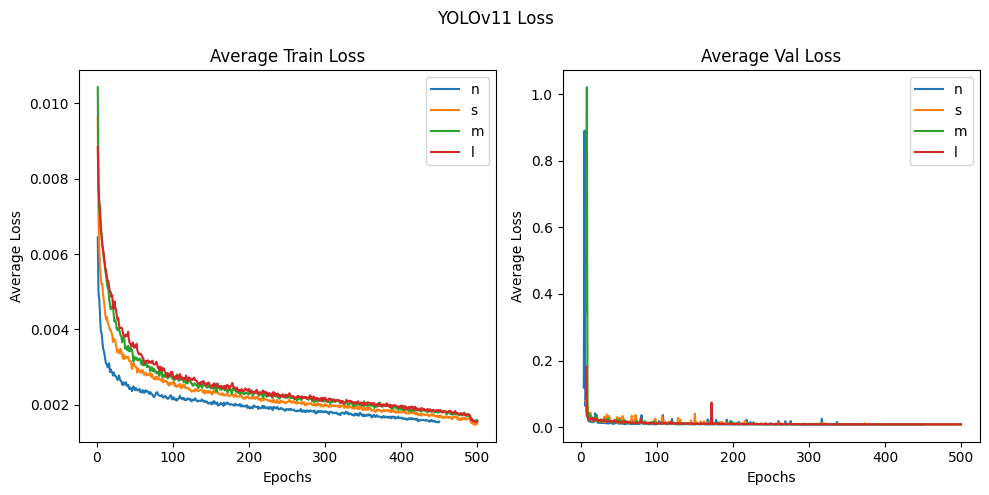

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("YOLOv11 Loss")
ax1.set_title("Average Train Loss")
ax1.plot(n_loss/400, label="n")
ax1.plot(s_loss/400, label="s")
ax1.plot(m_loss/400, label="m")
ax1.plot(l_loss/400, label="l")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Average Loss")
ax1.legend()

ax2.set_title("Average Val Loss")
ax2.plot(n_val_loss/100, label="n")
ax2.plot(s_val_loss/100, label="s")
ax2.plot(m_val_loss/100, label="m")
ax2.plot(l_val_loss/100, label="l")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss")
ax2.legend()
fig.tight_layout()
fig.align_labels()
fig.savefig("yolov11_all_avg_losses.pdf",bbox_inches='tight', transparent="True", pad_inches=0.1)

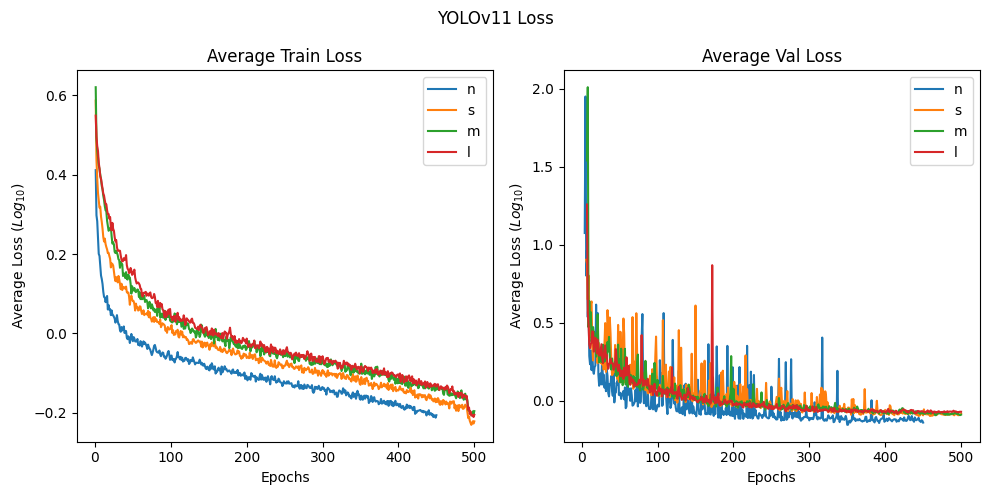

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("YOLOv11 Loss")
ax1.set_title("Average Train Loss")
ax1.plot(np.log10(n_loss), label="n")
ax1.plot(np.log10(s_loss), label="s")
ax1.plot(np.log10(m_loss), label="m")
ax1.plot(np.log10(l_loss), label="l")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Average Loss $(Log_{10})$")
ax1.legend()

ax2.set_title("Average Val Loss")
ax2.plot(np.log10(n_val_loss), label="n")
ax2.plot(np.log10(s_val_loss), label="s")
ax2.plot(np.log10(m_val_loss), label="m")
ax2.plot(np.log10(l_val_loss), label="l")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss $(Log_{10})$")
ax2.legend()
fig.tight_layout()
fig.align_labels()
fig.savefig("yolov11_all_avg_losses_log_loss.pdf",bbox_inches='tight', transparent="True", pad_inches=0.1)

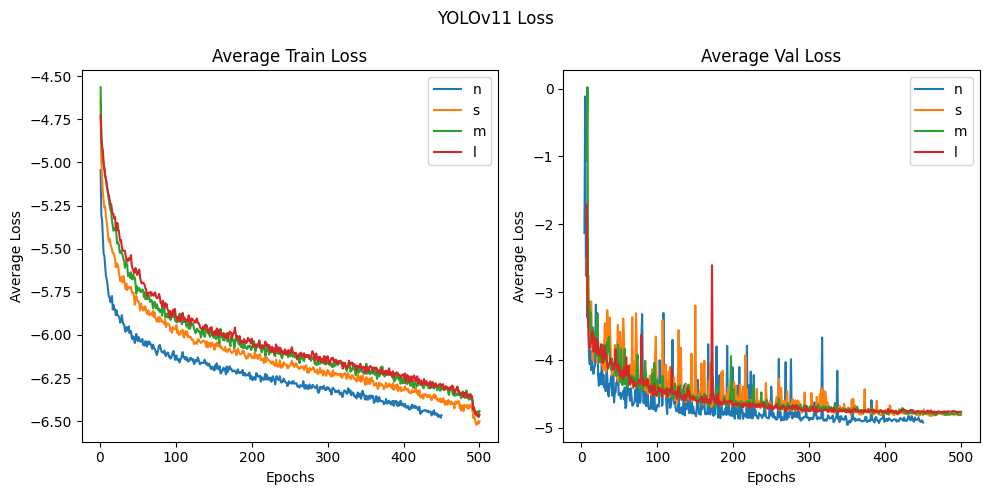

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("YOLOv11 Loss")
ax1.set_title("Average Train Loss")
ax1.plot(np.log(n_loss/400), label="n")
ax1.plot(np.log(s_loss/400), label="s")
ax1.plot(np.log(m_loss/400), label="m")
ax1.plot(np.log(l_loss/400), label="l")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Average Loss")
ax1.legend()

ax2.set_title("Average Val Loss")
ax2.plot(np.log(n_val_loss/100), label="n")
ax2.plot(np.log(s_val_loss/100), label="s")
ax2.plot(np.log(m_val_loss/100), label="m")
ax2.plot(np.log(l_val_loss/100), label="l")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss")
ax2.legend()
fig.tight_layout()
fig.align_labels()
fig.savefig("yolov11_all_avg_losses.pdf",bbox_inches='tight', transparent="True", pad_inches=0.1)